## Initial Analysis and Plots
This section looks at the data and draws simple conclusions from it as used in the submitted paper

In [309]:
import pandas as pd
pd.set_option('display.max_columns', 50)

In [310]:
df = pd.read_csv("data.csv")

In [311]:
df.shape

(9495235, 23)

In [312]:
df.head()

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,events,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
0,2355134,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:57:00,2014-07-01 00:07:00,10.066667,68.0,tstorms,131,Lincoln Ave & Belmont Ave,41.939365,-87.668385,15.0,303,Broadway & Cornelia Ave,41.945512,-87.645980,15.0
1,2355133,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:56:00,2014-07-01 00:00:00,4.383333,68.0,tstorms,282,Halsted St & Maxwell St,41.864580,-87.646930,15.0,22,May St & Taylor St,41.869482,-87.655486,15.0
2,2355130,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:33:00,2014-06-30 23:35:00,2.100000,68.0,tstorms,327,Sheffield Ave & Webster Ave,41.921687,-87.653714,19.0,225,Halsted St & Dickens Ave,41.919936,-87.648830,15.0
3,2355129,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:26:00,2014-07-01 00:24:00,58.016667,68.0,tstorms,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,194,State St & Wacker Dr,41.887155,-87.627750,11.0
4,2355128,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:16:00,2014-06-30 23:26:00,10.633333,68.0,tstorms,320,Loomis St & Lexington St,41.872187,-87.661501,15.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0


In [313]:
df.events.unique()

array(['tstorms', 'rain or snow', 'cloudy', 'not clear', 'clear', 'unknown'], dtype=object)

In [314]:
df['events'].value_counts()/sum(df['events'].value_counts())

cloudy          0.884496
clear           0.053903
rain or snow    0.045505
not clear       0.009285
tstorms         0.006755
unknown         0.000056
Name: events, dtype: float64

In [315]:
# Only using subset as dataset is so large
df = df[(df['year']==2017) & ((df['month']==6)|(df['month']==7)|(df['month']==8))]

In [316]:
df.describe()

,trip_id,year,month,week,day,hour,tripduration,temperature,from_station_id,latitude_start,longitude_start,dpcapacity_start,to_station_id,latitude_end,longitude_end,dpcapacity_end
count,1.157765e+06,1157765.0,1.157765e+06,1.157765e+06,1.157765e+06,1.157765e+06,1.157765e+06,1.157765e+06,1.157765e+06,1.157765e+06,1.157765e+06,1.157765e+06,1.157765e+06,1.157765e+06,1.157765e+06,1.157765e+06
mean,1.522107e+07,2017.0,7.032928e+00,2.865952e+01,2.754530e+00,1.386502e+01,1.225689e+01,7.569937e+01,1.865490e+02,4.190076e+01,-8.764431e+01,2.291579e+01,1.877208e+02,4.190141e+01,-8.764471e+01,2.269662e+01
std,5.534477e+05,0.0,8.179271e-01,3.825019e+00,1.901618e+00,4.873966e+00,7.521372e+00,6.792877e+00,1.304782e+02,3.642202e-02,2.248292e-02,8.842484e+00,1.306790e+02,3.677040e-02,2.258173e-02,8.736792e+00
min,1.426509e+07,2017.0,6.000000e+00,2.200000e+01,0.000000e+00,0.000000e+00,2.000000e+00,5.110000e+01,2.000000e+00,4.173665e+01,-8.780287e+01,0.000000e+00,2.000000e+00,4.173665e+01,-8.780287e+01,0.000000e+00
25%,1.473219e+07,2017.0,6.000000e+00,2.500000e+01,1.000000e+00,9.000000e+00,6.566667e+00,7.110000e+01,7.700000e+01,4.188096e+01,-8.765479e+01,1.500000e+01,7.700000e+01,4.188096e+01,-8.765549e+01,1.500000e+01
50%,1.522951e+07,2017.0,7.000000e+00,2.900000e+01,3.000000e+00,1.500000e+01,1.048333e+01,7.590000e+01,1.680000e+02,4.189388e+01,-8.763990e+01,1.900000e+01,1.700000e+02,4.189445e+01,-8.764107e+01,1.900000e+01
75%,1.569992e+07,2017.0,8.000000e+00,3.200000e+01,4.000000e+00,1.800000e+01,1.630000e+01,8.010000e+01,2.830000e+02,4.192154e+01,-8.762963e+01,2.700000e+01,2.830000e+02,4.192270e+01,-8.762963e+01,2.700000e+01
max,1.616353e+07,2017.0,8.000000e+00,3.500000e+01,6.000000e+00,2.300000e+01,6.000000e+01,9.500000e+01,6.250000e+02,4.206431e+01,-8.754939e+01,5.500000e+01,6.250000e+02,4.206431e+01,-8.754939e+01,5.500000e+01


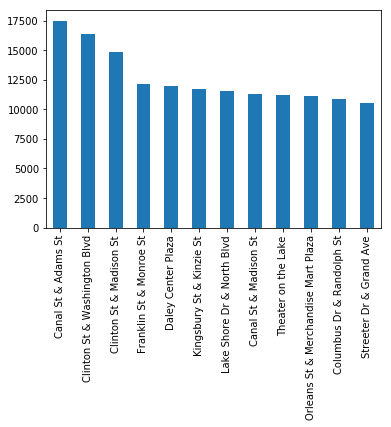

In [317]:
%matplotlib inline
x= df['from_station_name'].value_counts()
x=x[x>10000]
x.plot(kind='bar')

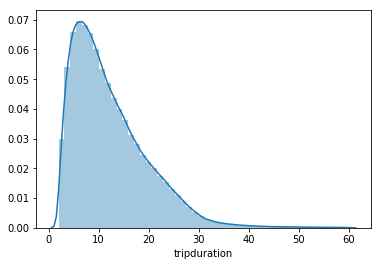

In [318]:
import seaborn as sns
sns.distplot(df['tripduration'])

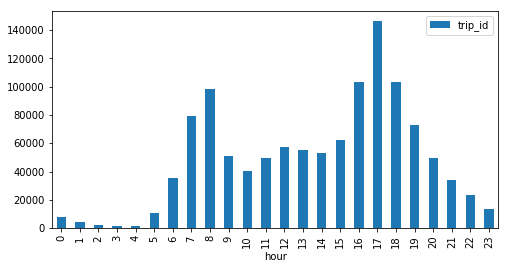

In [319]:
# 0 is Monday 
df.groupby(['hour']).count()[['trip_id']].plot(kind='bar',figsize=(8,4))

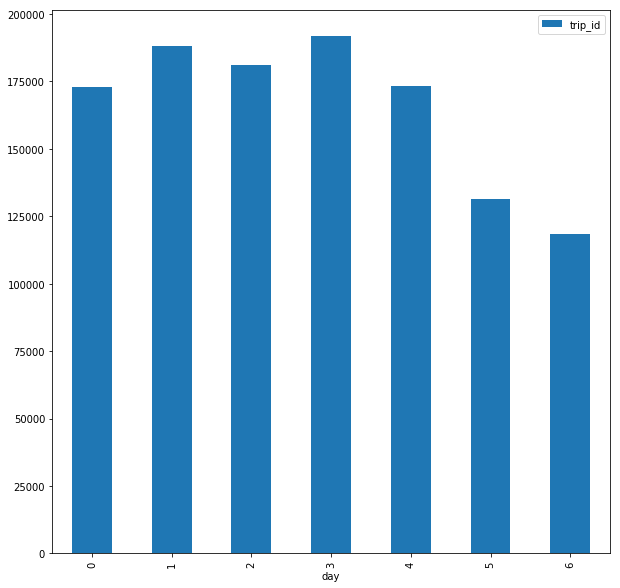

In [320]:
# 0 is Monday 
df.groupby(['day']).count()[['trip_id']].plot(kind='bar',figsize=(10,10))

In [321]:
df['Location'] = df[['latitude_start','longitude_start']].apply(tuple, axis=1)

In [322]:
# link to reference for mapping
# https://towardsdatascience.com/exploring-and-visualizing-chicago-transit-data-using-pandas-and-bokeh-part-ii-intro-to-bokeh-5dca6c5ced10

import math
def merc(Coords):
    lat = Coords[0]
    lon = Coords[1]
    
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale
    return (x, y)


df['coords_x'] = df['Location'].apply(lambda x: merc(x)[0])
df['coords_y'] = df['Location'].apply(lambda x: merc(x)[1])


In [323]:
total_start = df.groupby(['coords_x','coords_y'], as_index = False).count()[['coords_x','coords_y','Location']]

In [324]:
total_start['circle_size'] = total_start['Location'] / 750

In [325]:
# Plot Locations of stops
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON
p = figure(x_range=(-9780000, -9745000), y_range=(5130000, 5160000))
p.add_tile(CARTODBPOSITRON)
p.circle(x = total_start['coords_x'],
         y = total_start['coords_y'])
output_notebook()
show(p)

Loading BokehJS ...

In [326]:
# Plot popularity of locations
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON
p = figure(x_range=(-9780000, -9745000), y_range=(5130000, 5160000))
p.add_tile(CARTODBPOSITRON)
p.circle(x = total_start['coords_x'],
         y = total_start['coords_y'], 
         size=total_start['circle_size'],
         line_color="#FF0000", 
         fill_color="#FF0000",
         fill_alpha=0.05)
output_notebook()
show(p)

Loading BokehJS ...

## Model
This section will be for processing data to fit model and then evaluate the model

In [420]:
df_model = df[['month','week','day','hour','temperature','events','from_station_name','tripduration']]

In [421]:
df_model.head()

,month,week,day,hour,temperature,events,from_station_name,tripduration
6922904,6,26,4,23,72.0,cloudy,Desplaines St & Jackson Blvd,14.100000
6922905,6,26,4,23,72.0,cloudy,Clark St & Grace St,7.700000
6922906,6,26,4,23,72.0,cloudy,Sheffield Ave & Webster Ave,5.666667
6922907,6,26,4,23,72.0,cloudy,Canal St & Adams St,7.116667
6922908,6,26,4,23,72.0,cloudy,Damen Ave & Division St,9.666667


In [422]:
# creates binary outcome for duration of greater than 10 minutes.
df_model['duration'] = np.where(df['tripduration']>df['tripduration'].mean(),1,0)

C:\Users\rampa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [423]:
# creates binary clear or not clear for events
df_model.loc[df_model['events']=='cloudy','events']='clear'
df_model.loc[df_model['events']=='rain or snow','events']='not clear'
df_model.loc[df_model['events']=='tstorms','events']='not clear'
df_model = df_model[df_model['events']!='unknown']

C:\Users\rampa\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [424]:
df_model.head()

,month,week,day,hour,temperature,events,from_station_name,tripduration,duration
6922904,6,26,4,23,72.0,clear,Desplaines St & Jackson Blvd,14.100000,1
6922905,6,26,4,23,72.0,clear,Clark St & Grace St,7.700000,0
6922906,6,26,4,23,72.0,clear,Sheffield Ave & Webster Ave,5.666667,0
6922907,6,26,4,23,72.0,clear,Canal St & Adams St,7.116667,0
6922908,6,26,4,23,72.0,clear,Damen Ave & Division St,9.666667,0


In [425]:
counts = df_model['from_station_name'].value_counts()
repl = counts[counts <= 9000].index
dummy = pd.get_dummies(df.from_station_name.replace(repl,'other'))

In [426]:
df_model = df_model.drop(['from_station_name','tripduration'], axis = 1)

In [427]:
df_model.head()

,month,week,day,hour,temperature,events,duration
6922904,6,26,4,23,72.0,clear,1
6922905,6,26,4,23,72.0,clear,0
6922906,6,26,4,23,72.0,clear,0
6922907,6,26,4,23,72.0,clear,0
6922908,6,26,4,23,72.0,clear,0


In [428]:
# data for model leaves out one to avoid multicollinearity
data_model = df_model.join(dummy.loc[:,'Canal St & Madison St':])

In [429]:
#moves duration binary to last column
data_model = data_model[['month', 'week', 'day', 'hour', 'temperature', 'events',
       'Canal St & Madison St', 'Clinton St & Madison St',
       'Clinton St & Washington Blvd', 'Columbus Dr & Randolph St',
       'Daley Center Plaza', 'Dearborn St & Erie St',
       'Franklin St & Monroe St', 'Kingsbury St & Kinzie St',
       'Lake Shore Dr & North Blvd', 'Michigan Ave & Washington St',
       'Orleans St & Merchandise Mart Plaza', 'Streeter Dr & Grand Ave',
       'Theater on the Lake', 'other', 'duration']]

In [430]:
data_model['events'] = np.where(data_model['events']=='clear',1,0)

In [431]:
# Head of processed data before splitting into train and test
data_model.head()

,month,week,day,hour,temperature,events,Canal St & Madison St,Clinton St & Madison St,Clinton St & Washington Blvd,Columbus Dr & Randolph St,Daley Center Plaza,Dearborn St & Erie St,Franklin St & Monroe St,Kingsbury St & Kinzie St,Lake Shore Dr & North Blvd,Michigan Ave & Washington St,Orleans St & Merchandise Mart Plaza,Streeter Dr & Grand Ave,Theater on the Lake,other,duration
6922904,6,26,4,23,72.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
6922905,6,26,4,23,72.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6922906,6,26,4,23,72.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6922907,6,26,4,23,72.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6922908,6,26,4,23,72.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [432]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = data_model.iloc[:,:-1]
y = data_model['duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [433]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.60288774364437281

In [434]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[201974   3050]
 [134879   7427]]


In [435]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = data_model.iloc[:,:-1]
y = data_model['duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.60048944807531746

In [436]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[186091  18697]
 [120065  22477]]
